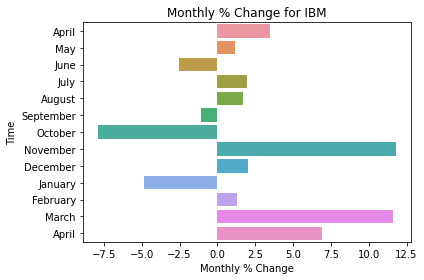

In [19]:
import io
import requests
import pandas as pd 
import matplotlib as plt
import matplotlib.pyplot as plta
import seaborn as sns

API_KEY = "J9C3GHZ237UWFTA2"

def alpha_vantage_equity(symb,API_KEY):
    link = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={}&outputsize=full&apikey={}&datatype=csv'.format(symb,API_KEY)
    rq = requests.get(link)
    urlData = rq.content
    rawData = pd.read_csv(io.StringIO(urlData.decode('utf-8')))
    # returns encoded utf-8 CSV format but in a Pandas DataFrame
    return rawData


# INPUT
qwery = input('Please enter the stock (ticker) for which you want information: ')
data_point = alpha_vantage_equity(qwery,API_KEY)

time_series = pd.DataFrame()
time_series.insert(0,'timestamp',[data_point['timestamp'].iloc[i] for i in range(len(data_point['timestamp'])-1,0,-1)])
time_series.insert(1,'adjusted_close',[data_point['adjusted_close'].iloc[i] for i in range(len(data_point['adjusted_close'])-1,0,-1)])
time_series = time_series.set_index('timestamp',inplace=False)

data = time_series[-550:]

point = pd.DataFrame(time_series.pct_change())
point = point.dropna()
point.index = pd.to_datetime(point.index)
point = point[-252:]
monthly = point.resample('BM').sum()

## monthly change plot
fig = sns.barplot(x=monthly['adjusted_close']*100,y=monthly.index)
fig.set_ylabel('Time')
fig.set_xlabel('Monthly % Change')
fig.set_yticklabels(['April','May','June','July','August','September','October','November','December','January','February','March','April'])
fig.set_title('Monthly % Change for {}'.format(qwery))
plta.tight_layout()
plta.savefig('monthly.jpg',dpi=250)